# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Ishimtsev Vladislav*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
plt.xkcd()
import numpy as np
import random
import math
%matplotlib inline

### Task 1

Before we start to consider models A and B, look at Barabasi and Albert dynamical grow model. This model has Power Law distribution and scale-free properties. 

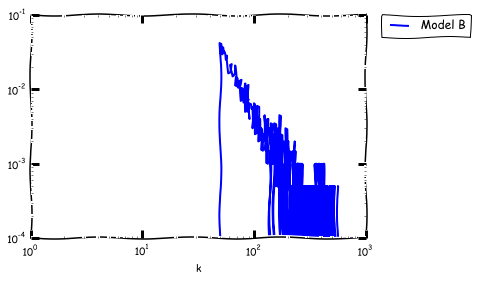

In [2]:
n = 2000
m = 50
BA = nx.barabasi_albert_graph(n,m)
y_model = np.bincount(list(BA.degree(np.arange(n)).values()))
y_model = y_model/np.sum(y_model)

plt.plot(np.arange(len(y_model)),y_model, color='b', label='Model B')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

200 400 600 800 1000 1200 1400 1600 1800 2000 

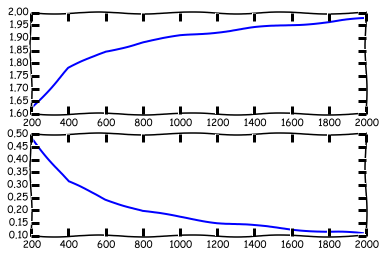

In [3]:
ave_clst = []
ave_path = []
x = np.arange(200,n+1,200)
for i in x:
    BA = nx.barabasi_albert_graph(i,m)
    ave_clst.append(nx.average_clustering(BA))
    ave_path.append(nx.average_shortest_path_length(BA))
    print(i, end=' ')
plt.subplot(211)
plt.plot(x, ave_path,label='average path length')
plt.subplot(212)
plt.plot(x, ave_clst,label='average clustering coefficient')

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

In [4]:
def BA_without_pref_iter(g, m):
    '''
    Add node to graph g with m egdes
    '''
    s = len(g)
    g.add_node(s)
    ind = random.sample(range(s), m)
    g.add_edges_from([(s, ind[x]) for x in range(m)])
    return g

Let's check dependence between time and degree of some nodes in Graph $G$ 

0 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 

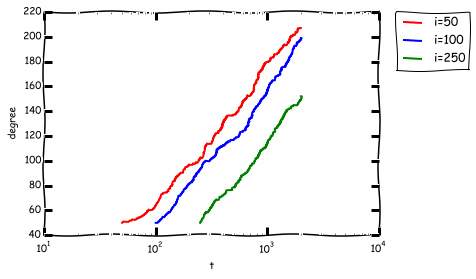

In [5]:
n_0 = 50
t = n
y10,y20,y40 = [],[],[]
ave_path, ave_clst = [],[]
g = nx.Graph()
g.add_nodes_from(range(n_0))
for i in range(t):
    BA_without_pref_iter(g, m)
    if (i % m == 0):
        ave_path.append(nx.average_shortest_path_length(g))
        ave_clst.append(nx.average_clustering(g))
        print(i,end=" ")
    if (len(g) > m+n_0):
        y10.append(g.degree(m+n_0))
    if (len(g) > 2*m+n_0):
        y20.append(g.degree(2*m+n_0))
    if (len(g) > 5*m+n_0):
        y40.append(g.degree(5*m+n_0))
    
plt.plot(np.arange(m,t),y10, color='r', label='i=' + str(m))
plt.plot(np.arange(2*m,t),y20, color='b', label='i=' + str(2*m))
plt.plot(np.arange(5*m,t),y40, color='g', label='i=' + str(5*m))
plt.xlabel("t")
plt.ylabel("degree")
plt.xscale('log')
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Degree of nodes follows a logarithmic time dependence. Now, let's describe properties of this distribution.
Expected value of $i$-th node degree after $t$ iterations: $$E(k_i) = m + \frac{m}{n_0 + i - 1} + \frac{m}{n_0 + i} + ... + \frac{m}{n_0 + t - 1} \approx \big| \text{ garmonic series } \approx \ln \big| \approx m(1+\ln\frac{t}{i})$$ 

#### Compute PDF

Find $\hat{i}$, that for $\forall i >= \hat{i}$ node $i$ has degree less then $k$: $\; m(1+\ln\frac{t}{i}) \le k \; \; \Rightarrow \;\; i \ge t\exp(\frac{m-k}{m})$

$$Pr(k_i \le k) = 1-\exp(1-\frac{k}{m}) \;\; \Rightarrow \;\; PDF(k) = \frac{e}{m}\exp(-\frac{k}{m}),\; k \ge m$$

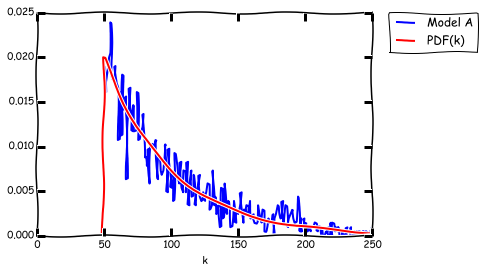

In [6]:
y_model = np.bincount(list(g.degree(np.arange(t+n_0)).values()))
y_model = y_model/np.sum(y_model)
x = np.arange(len(y_model))
y_pdf = np.hstack((np.zeros(m),math.e / m *np.exp(-(x[n_0:]/m))))
plt.plot(x,y_model, color='b', label='Model A')
plt.plot(x,y_pdf, color='r', label='PDF(k)')
plt.xlabel("k")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We can see that this distribution has exponentional tails.

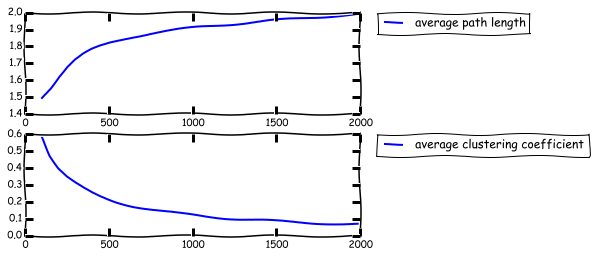

In [7]:
x = np.arange(m,t,m) + n_0
plt.subplot(211)
plt.plot(x, ave_path[1:],label='average path length')

_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplot(212)
plt.plot(x, ave_clst[1:],label='average clustering coefficient')
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>
P.S: initial graph is a chain (to have path length and not null probability)

In [8]:
def BA_without_grow_iter(g,m):
    '''
    Randomly choose one node from "g" and form "m" edges with prefferential attachment
    if choosen node has degree 0 then change considering node to first node with degree 0 (useful for statistics)
    '''
    x = random.randint(0, len(g)-1)
    
    nodes = [k for k in g.nodes() if k not in g[x]]
    nodes.remove(x)
    degrees = sum(g.degree(nodes).values())
    
    
    for y in nodes:
        if random.uniform(0,1) <= m*g.degree(y) / degrees:
            g.add_edge(x,y)
    return g

0 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 

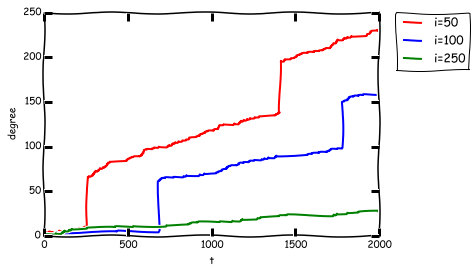

In [9]:
G = nx.cycle_graph(n)
y10,y20,y40 = [],[],[]
ave_path, ave_clst = [],[]
for i in range(n):
    BA_without_grow_iter(G,m)
    y10.append(G.degree(m))
    y20.append(G.degree(2*m))
    y40.append(G.degree(5*m))
    if (i % m == 0):
        ave_path.append(nx.average_shortest_path_length(G))
        ave_clst.append(nx.average_clustering(G))
        print(i,end=" ")
plt.plot(range(n),y10, color='r', label='i=' + str(m))
plt.plot(range(n),y20, color='b', label='i=' + str(2*m))
plt.plot(range(n),y40, color='g', label='i=' + str(5*m))
plt.xlabel("t")
plt.ylabel("degree")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Degree of nodes follows a linear time dependence. Leaps in plot are means that this node has been chosen at time $t$. 

Now, let's describe properties of this distribution. 

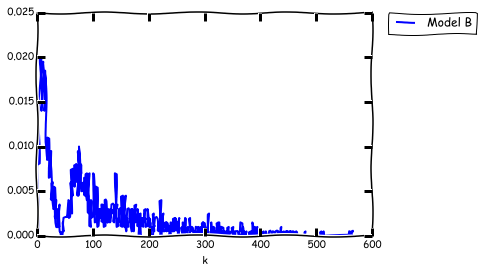

In [10]:
y_model = np.bincount(list(G.degree(np.arange(n)).values()))
y_model = y_model/np.sum(y_model)

x = np.arange(len(y_model))
plt.plot(x,y_model, color='b', label='Model B')
plt.xlabel("k")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

And in log-log scale.

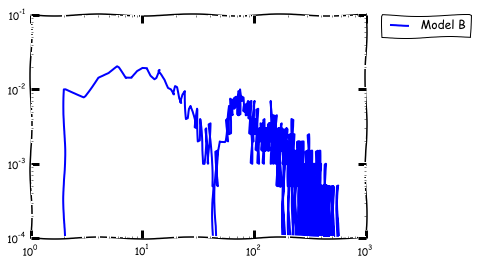

In [11]:
plt.plot(x,y_model, color='b', label='Model B')
plt.xscale('log')
plt.yscale('log')
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

At this plot we can see that distribution changes from the Power Law to a normal distribution. 

Unfortunately, then we have $t = \frac{n(n-1)}{2}$ it will be complete graph.  It is not a good model.

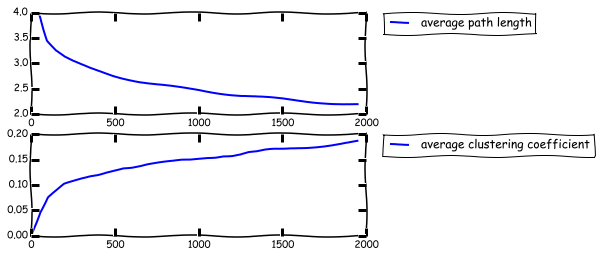

In [12]:
x = np.arange(0,n,m)
plt.subplot(211)
plt.plot(x[1:], ave_path[1:],label='average path length')
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplot(212)
plt.plot(x, ave_clst,label='average clustering coefficient')
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

After failures in models A and B we can conclude that growing and preferential attachment are needed together if we want 
Power Law distribution.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

In [13]:
def copy_iter(g, q):
    x = len(g)
    g.add_node(x)
    
    edges =[(x,y) if random.uniform(0,1)<q else (x,random.randint(0,x-1)) for y in g[random.randint(0,x-1)].keys()]
    g.add_edges_from(edges)

0 100 200 300 400 

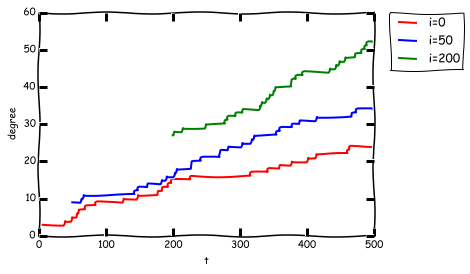

In [17]:
n, q, t = 50, 0.8, 500
g = nx.erdos_renyi_graph(n,4/n)
y10,y20,y40 = [],[],[]
ave_path, ave_clst = [],[]
for i in range(t):
    copy_iter(g,q)
    y10.append(g.degree(n))
    if (len(g) > 2*n):
        y20.append(g.degree(2*n))
    if (len(g) > 5*n):
        y40.append(g.degree(5*n))
    if (i % (2*n) == 0):
        ave_path.append(nx.average_shortest_path_length(g))
        ave_clst.append(nx.average_clustering(g))
        print(i,end=" ")

plt.plot(np.arange(t),y10, color='r', label='i=' + str(n-50))
plt.plot(np.arange(n,t),y20, color='b', label='i=' + str(2*n-50))
plt.plot(np.arange(4*n,t),y40, color='g', label='i=' + str(5*n-50))
plt.xlabel("t")
plt.ylabel("degree")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

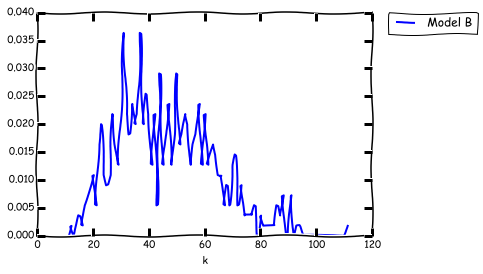

In [18]:
y_model = np.bincount(list(g.degree(np.arange(n+t)).values()))
y_model = y_model/np.sum(y_model)

x = np.arange(len(y_model))
plt.plot(x,y_model, color='b', label='Model B')

plt.xlabel("k")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

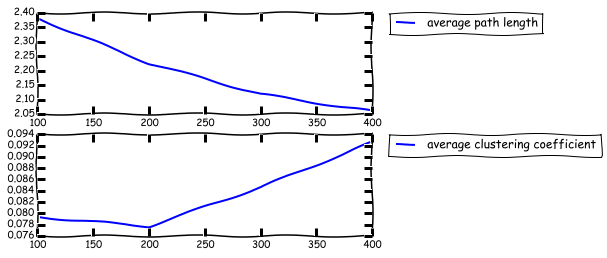

In [19]:
x = np.arange(2*n,t,2*n)
plt.subplot(211)
plt.plot(x, ave_path[1:],label='average path length')
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplot(212)
plt.plot(x, ave_clst[1:],label='average clustering coefficient')
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)